# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?

- A model is considered linear if the relationship between the dependent variable and the independent variables is linear, meaning that the change in the dependent variable (y values) is proportional to the change in the independent variables (x values).  

- **Mathematically**, (as I learned in DS 3025 class) it implies that the model can be represented as a linear equation of the best-fitting line that minimizes the sum of squared errors which is:  y = β₀ + β₁x + ε, where  β₀ is the intercept (price if size is 0), β₁ is the slope (price increase per 1 unit size increase), and ε is the error term.

- **Graphically**, a linear model can have the dependent and independent variables as a straight line (or a hyperplane in multiple dimensions), with the coefficients representing the slope and intercept of this line.
Linear in what? The linearity is in the parameters, not necessarily the variables themselves. As such, it is possible to have non-linear variables (e.g., squared terms) in a linear model as long as the parameters are linear.

**Real life example of a linear model**:  Imagine a real estate agent wants to predict house prices (y) based on size/square footage (x). A linear model assumes that for every extra square foot, the price increases by a consistent amount. For instance, a mansion's price per square foot is likely higher than a small apartment. Mathematically, a linear model would assume that: y = β₀ + β₁x + ε, where  β₀ is the intercept (price if size is 0), β₁ is the slope (price increase per unit size increase), and ε is the error term. This implies a constant increase in price for each additional square foot. A graph of this would be a straight line. The linearity assumption might hold reasonably well within a specific price range or house type, but not across all properties. In a non-linear example, if price increases proportionally to the square root of size, the relationship is not linear:  y = β₀ + β₁√x + ε. While we can still estimate this with linear regression techniques (using transformation), the underlying relationship is not linearly proportional.


2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)

**Coefficient interpretation**: The interpretation of the coefficient for a dummy variable depends on how the intercept is handled.  
- If the intercept is included, the coefficient represents the difference in the dependent variable between the group represented by the dummy variable (coded as 1) and the reference group (coded as 0), holding all other variables constant.

- If the intercept is excluded, the coefficient represents the average value of the dependent variable for the group represented by the dummy variable.

**Real life example of Interpreting Dummy Variable Coefficients**:  Imagine a company wanting to predict employee salaries (y) based on experience (x) and gender (dummy variable: 1=female, 0=male).
With intercept:  If the model is y = β₀ + β₁x + β₂gender + ε, β₂ represents the difference in average salary between female and males employees holding experience constant. A positive coefficient indicates a pay gap favoring females, such as if β₂ = 2000, females earn $2000 more than males with the same experience. β₀ is the average salary of males with zero experience.

- Without Intercept:  If the intercept is removed, the model is y = β₁x + β₂gender + ε, and β₂ represents the average salary of females, and the model implicitly assumes males have a salary of 0 which is not so in real life.

3. Can linear regression be used for classification? Explain why, or why not.

**Linear regression**:  Predicts a continuous outcome variable
**Classification**:  Predicts a categorical outcome variable.  

**Using a real life example to explain why linear regression is not ideally suited for classification**: Imagine a bank wants to predict whether a loan applicant will default (1=default, 0=no default). Notice that the default is categorical output (0 or 1). Using linear regression directly in this case is problematic because the model might predict a probability of default as 1.2 or -0.5, which fall outside the [0, 1] range specifically designed for binary classification tasks and will make interpretation difficult.

4. What are signs that your linear model is over-fitting?

**Overfitting**: Occurs when a model learns the training data too well, including the noise, leading to poor generalization to new data.

**Signs of overfitting include**:
- High R-squared on the training data but low R-squared on the testing data.
- Poor performance on unseen data.
- High sensitivity to small changes in the training data.

**Real life example of overfitting**: A UVA medical researcher develops a model to predict patient survival time after a specific surgery based on various health indicators. The model performs extremely well on the training data (with an R² of 0.99 perfect fit), predicting survival times with high accuracy. However, when the model was tested (test data) on new patients, the model's predictive power was dramatically lower (with R² of 0.5). This suggests overfitting because the model captured/memorized the training data's random variations or noise instead of learning generalizable patterns about survival after surgery.

5. Clearly explain multi-colinearity using the two-stage least squares technique.

**Multicollinearity**: Refers to a high correlation between two or more independent variables in a regression model.  This makes it difficult to isolate the individual effects of each variable on the dependent variable. To solve this problem, a two-stage least squares technique is applied.

**Two-Stage Least Squares (2SLS) technique**: This technique is used to address multicollinearity when one or more independent variables are endogenous (correlated with the error term).

- In First Stage: An instrumental variable (IV) is regressed on the endogenous variables and other exogenous variables. The predicted values from this regression are then used as instruments in the second stage.

- In Second Stage: The dependent variable is regressed on the predicted values of the endogenous variables and the other exogenous variables found in the First Stage. This helps to mitigate the bias caused by multicollinearity.

**Using a real example to clearly explain multicollinearity**: A data scientist wants to predict crop yield (y) using fertilizer (x1) and rainfall (x2).  If fertilizer use and rainfall are highly correlated (multicollinearity), it's hard to isolate their individual effects. This multicollinearity makes it hard to isolate which has more effect, fertilizer or rainfall.  Therefore a Two-Stage Least Squares technique is needed to isolate these variables by identifying an instrument or a variable correlated with fertilizer but not directly with yield (e.g., the price of fertilizer)

- Stage 1: Regress fertilizer use on the price of fertilizer and rainfall.  Get predicted fertilizer use.
- Stage 2: Regress yield on predicted fertilizer use and rainfall. This reduces the influence of the correlation
between fertilizer and rainfall on the yield estimates.

6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?


Nonlinear relationships can be incorporated using several techniques:
- Polynomial regression: Include polynomial terms (e.g., x², x³) of the independent variables.
- Spline regression: Use piecewise polynomial functions to model the relationship.
- Generalized additive models (GAMs): Allow for flexible non-parametric modeling of the relationships.
- Transformation of variables: Transform the independent or dependent variables (e.g., logarithmic or square root transformation)

**Real life example on how to incorporate nonlinear relationships**: An Amazon marketing team is studying the relationship between advertising spending (x) and sales (y). Initially, they find that increasing spending leads to more sales. However, after a certain point, additional spending yields diminishing returns. In this case, a simple linear model will not capture the decrease. As such, the team may need to use nonlinear relationshipsto account for the diminishing returns. For example, the logarithmic transformation of sales, log(y) = β₀ + β₁x + ε could model diminishing returns to advertising. Similarly, a polynomial regression (e.g., including x²), y = β₀ + β₁x + β₂x² + ε could show a curved relationship.

7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

I will explain these concepts using the real life example: imagine a company wanting to predict employee salaries (y) based on experience (x) and gender (dummy variable: 1=female, 0=male).

- Intercept: The average salary of a male employee with zero years of experience. This is often a baseline.
- Slope (Experience): For every additional year of experience, salary increases by this amount, holding gender constant.
- Dummy coefficient (Gender): The average salary difference between female and male employees with the same amount of experience.


**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#Loading dataset
df = pd.read_csv('Q1_clean.csv')
df.head(5)

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
#1: Average prices and scores by Neighbourhood
avg_prices_scores = df.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean()
print(avg_prices_scores)

                    Price  Review Scores Rating
Neighbourhood                                  
Bronx           75.276498             91.654378
Brooklyn       127.747378             92.363497
Manhattan      183.664286             91.801496
Queens          96.857233             91.549057
Staten Island  146.166667             90.843750


In [ ]:
#Most expensive borough
sorted_boroughs = avg_prices_scores.sort_values(by='Price', ascending=False)
most_expensive_borough = sorted_boroughs.iloc[0]
print(most_expensive_borough)

Price                   183.664286
Review Scores Rating     91.801496
Name: Manhattan, dtype: float64


The xxxx is the most expensive

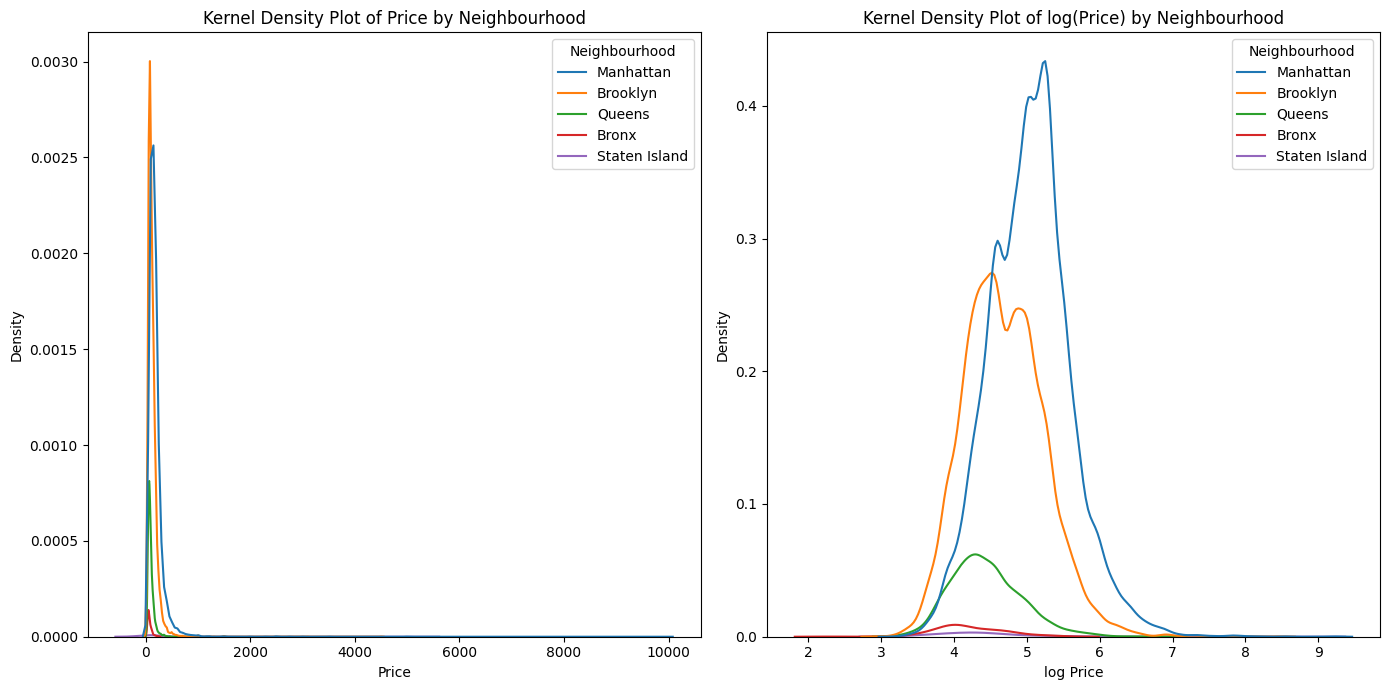

In [ ]:
#Kernel density plot of price and log price, grouping by Neighbourhood
# Create a log-transformed price column
df['log Price'] = np.log(df['Price'])

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Price', hue='Neighbourhood')
plt.title('Kernel Density Plot of Price by Neighbourhood')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='log Price', hue='Neighbourhood')
plt.title('Kernel Density Plot of log(Price) by Neighbourhood')

plt.tight_layout()
plt.show()

In [ ]:
#2: Regress price on Neighbourhood
dummies = pd.get_dummies(df['Neighbourhood'], drop_first=False)
regressed_df = pd.concat([df, dummies], axis=1)
regressed_df.head(5)

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type,Log Price,log Price,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,549,96.0,Manhattan,Apartment,Private room,6.308098,6.308098,False,False,True,False,False
1,149,100.0,Brooklyn,Apartment,Entire home/apt,5.003946,5.003946,False,True,False,False,False
2,250,100.0,Manhattan,Apartment,Entire home/apt,5.521461,5.521461,False,False,True,False,False
3,90,94.0,Brooklyn,Apartment,Private room,4.499810,4.499810,False,True,False,False,False
4,270,90.0,Manhattan,Apartment,Entire home/apt,5.598422,5.598422,False,False,True,False,False


In [ ]:
#Calculating coefficients from regression without intercept
X = dummies
y = regressed_df['Price']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

coefficients = model.coef_

coefficients_df = pd.DataFrame(coefficients, index=X.columns, columns=['Coefficient'])
print(coefficients_df)

               Coefficient
Bronx            75.276498
Brooklyn        127.747378
Manhattan       183.664286
Queens           96.857233
Staten Island   146.166667


The patterns are

In [ ]:
#3: Repeating part 2 with an intercept in the linear model
X = dummies
y = regressed_df['Price']

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

coefficients = model.coef_

coefficients_df = pd.DataFrame(coefficients, index=X.columns, columns=['Coefficient'])
print(coefficients_df)

               Coefficient
Bronx           -50.665915
Brooklyn          1.804966
Manhattan        57.721874
Queens          -29.085180
Staten Island    20.224254


In [ ]:
#Calculate intercept
intercept = model.intercept_
print('The intercept is:', intercept)

The intercept is: 125.9424123463574


In [ ]:
#4: Split the sample 80/20 into a training and a test set
X = dummies
y = regressed_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#Calculate the R^2 and RMSE values for test set
r2 = model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('The R^2 on the test set is:', r2)
print('The RMSE on the test set is:', rmse)

The R^2 on the test set is: 0.04660698897820026
The RMSE on the test set is: 140.86790191815578


In [ ]:
#Calculate coefficient on Review Scores Rating
review_scores_rating_coeff = model.coef_[0]
print('The coefficient on Review Scores Rating is:', review_scores_rating_coeff)

The coefficient on Review Scores Rating is: -40.749130653231845


In [ ]:
#Most expensive property
avg_price_by_property_type = regressed_df.groupby('Property Type')['Price'].mean().sort_values(ascending=False)

most_expensive_property_type = avg_price_by_property_type.index[0]

print('The most expensive property to rent is:', most_expensive_property_type)

The most expensive property to rent is: Condominium


In [ ]:
#5: Regression of Price on Review Scores Rating and Neighbourhood and Property Type
dummies = pd.get_dummies(df[['Neighbourhood', 'Property Type']], drop_first=False)
regressed_df = pd.concat([df, dummies], axis=1)
regressed_df.head(5)

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type,Log Price,log Price,Neighbourhood_Bronx,Neighbourhood_Brooklyn,Neighbourhood_Manhattan,...,Property Type_Condominium,Property Type_Dorm,Property Type_House,Property Type_Hut,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa
0,549,96.0,Manhattan,Apartment,Private room,6.308098,6.308098,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,149,100.0,Brooklyn,Apartment,Entire home/apt,5.003946,5.003946,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,250,100.0,Manhattan,Apartment,Entire home/apt,5.521461,5.521461,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,90,94.0,Brooklyn,Apartment,Private room,4.499810,4.499810,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,270,90.0,Manhattan,Apartment,Entire home/apt,5.598422,5.598422,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Split data 80/20 into a training and a test set
X = pd.concat([df[['Review Scores Rating']], dummies], axis=1)
y = regressed_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#Calculate R^2 and RMSE values on test set
r2 = model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('The R^2 on the test set is:', r2)
print('The RMSE on the test set is:', rmse)

The R^2 on the test set is: 0.054242713551245325
The RMSE on the test set is: 140.30266238276283


In [ ]:
#Calculate coefficient on Review Scores Rating
review_scores_coeff = model.coef_[0]
print('The coefficient on Review Scores Rating is:', review_scores_coeff)

The coefficient on Review Scores Rating is: 1.2010106602298551


In [ ]:
#Most expensive property to rent
avg_price_by_property_type = regressed_df.groupby('Property Type')['Price'].mean().sort_values(ascending=False)

most_expensive_property_type = avg_price_by_property_type.index[0]

print('The most expensive property to rent is:', most_expensive_property_type)

The most expensive property to rent is: Condominium


6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5?

**Part 4 coefficient**: The coefficient for part 4 was "-40.749130653231845", which suggests that for each 1-point increase in the Review Scores Rating, the price decreases by $40.75.

**Part 5 coefficient**: The coefficient for part 5 was 1.2010106602298551, which suggests that for each 1-point increase in the Review Scores Rating, the price increases by $1.20, while controlling for the effects of Neighbourhood and Property Type.

The change in the coefficient from -40.75 to 1.20 occured because the inclusion of additional variables (in part 5) changes how the model interprets the effect of Review Scores Rating on Price.

In multiple linear regression, adding more variables (like Neighbourhood and Property Type) can change the coefficients of the existing variables. This happens because the model is now controlling for the effects of these new variables. Essentially, the coefficient on Review Scores Rating in part 5 is measuring the effect of the review scores on price after accounting for the influence of Neighbourhood and Property Type.

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#1: Loading dataset
df = pd.read_csv('cars_hw.csv')
df.head(5)

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [5]:
#Check for missing (null) values in dataset
df.isnull().sum()

,0
Unnamed: 0,0
Make,0
Make_Year,0
Color,0
Body_Type,0
Mileage_Run,0
No_of_Owners,0
Seating_Capacity,0
Fuel_Type,0
Transmission,0


In [7]:
#2: Summarizing price variable
df['Price'].describe()

,Price
count,9.760000e+02
mean,7.410195e+05
std,3.673234e+05
min,1.880000e+05
25%,4.757500e+05
50%,6.665000e+05
75%,8.830000e+05
max,2.941000e+06


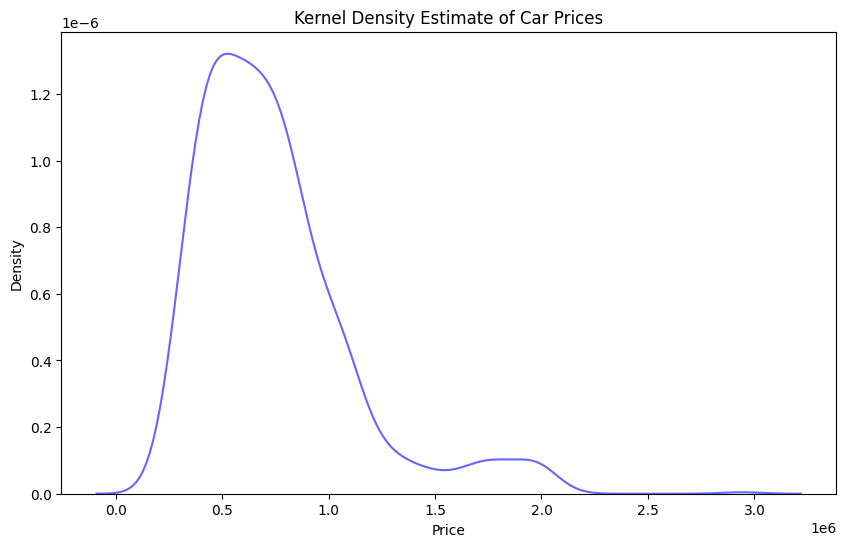

In [8]:
#Kernel density plot of price
plt.figure(figsize=(10,6))
sns.kdeplot(df['Price'], color='blue', alpha=0.6)
plt.title('Kernel Density Estimate of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [9]:
#Group price by make (brand)
df.groupby('Make')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


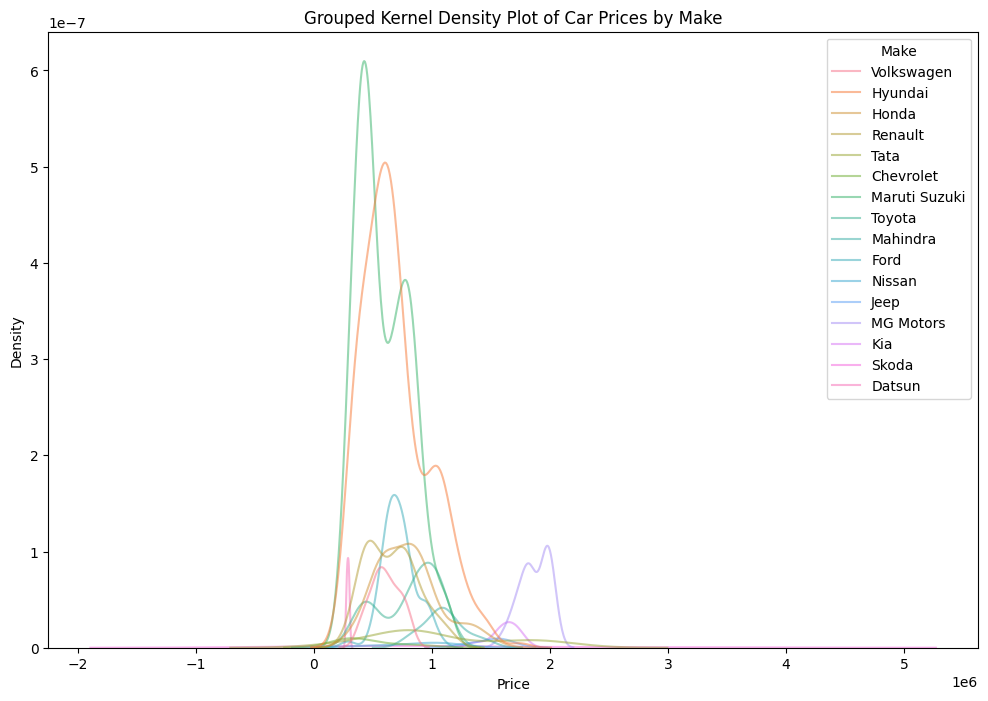

In [10]:
#Grouped KDE plot by make (brand)
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x='Price', hue='Make', alpha=0.5)
plt.title('Grouped Kernel Density Plot of Car Prices by Make')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [11]:
#3: Split data into an 80% training set and a 20% testing set.
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#4: Model for regressing price on numeric variables with R^2 and RMSE values
numeric_columns = X.select_dtypes(include=['number']).columns

X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

model = LinearRegression()

model.fit(X_train_numeric, y_train)

y_train_pred = model.predict(X_train_numeric)
y_test_pred = model.predict(X_test_numeric)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)

print('The R^2 on the training set is:', r2_train)
print('The R^2 on the test set is:', r2_test)

print('The RMSE on the training set is:', rmse_train)
print('The RMSE on the test set is:', rmse_test)

The R^2 on the training set is: 0.31748308843901385
The R^2 on the test set is: 0.2908824591636343
The RMSE on the training set is: 95266117921.29007
The RMSE on the test set is: 81332578555.98566


In [13]:
#Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone
categorical_columns = X.select_dtypes(exclude=['number']).columns

X_train_categorical = pd.get_dummies(X_train[categorical_columns], drop_first=True)
X_test_categorical = pd.get_dummies(X_test[categorical_columns], drop_first=True)

X_train_categorical, X_test_categorical = X_train_categorical.align(X_test_categorical, join='left', axis=1, fill_value=0)

model_categorical = LinearRegression()

model_categorical.fit(X_train_categorical, y_train)

y_train_pred_categorical = model_categorical.predict(X_train_categorical)
y_test_pred_categorical = model_categorical.predict(X_test_categorical)

r2_test_categorical = r2_score(y_test, y_test_pred_categorical)
rmse_test_categorical = mean_squared_error(y_test, y_test_pred_categorical)

print('The R^2 for the test set is:', r2_test_categorical)
print('The RMSE for the test set is:', rmse_test_categorical)

The R^2 for the test set is: 0.7086843554399442
The RMSE for the test set is: 33412588437.48695


**R²**: Model 1 performs better on the test set because it has a higher R² value, indicating it explains more of the variance in the target (Price).

**RMSE**: Model 1 also has a lower RMSE, suggesting it makes more accurate predictions on the test set.

Model 1 (numeric variables only) performs better than Model 2 (categorical variables only) on the test set.

In [14]:
#Make a third model that combines all the regressors from the previous two
X_train_combined = pd.concat([X_train[numeric_columns], X_train_categorical], axis=1)
X_test_combined = pd.concat([X_test[numeric_columns], X_test_categorical], axis=1)

model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train)

y_train_pred_combined = model_combined.predict(X_train_combined)
y_test_pred_combined = model_combined.predict(X_test_combined)

r2_test_combined = r2_score(y_test, y_test_pred_combined)
rmse_test_combined = mean_squared_error(y_test, y_test_pred_combined)

print('The R^2 on the test set is:', r2_test_combined)
print('The RMSE on the test set is:', rmse_test_combined)

The R^2 on the test set is: 0.8163910583949119
The RMSE on the test set is: 21059116164.386646


In [15]:
#5: Expand the set of numerical variables and increase the degree of the expansion
from sklearn.preprocessing import PolynomialFeatures
degrees = [1, 2, 3, 4, 5]

r2_train_results = []
r2_test_results = []
rmse_train_results = []
rmse_test_results = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)

    X_train_poly = poly.fit_transform(X_train[numeric_columns])
    X_test_poly = poly.transform(X_test[numeric_columns])

    model_poly = LinearRegression()

    model_poly.fit(X_train_poly, y_train)

    y_train_pred_poly = model_poly.predict(X_train_poly)
    y_test_pred_poly = model_poly.predict(X_test_poly)

    r2_train = r2_score(y_train, y_train_pred_poly)
    r2_test = r2_score(y_test, y_test_pred_poly)
    rmse_train = mean_squared_error(y_train, y_train_pred_poly)
    rmse_test = mean_squared_error(y_test, y_test_pred_poly)

    r2_train_results.append(r2_train)
    r2_test_results.append(r2_test)
    rmse_train_results.append(rmse_train)
    rmse_test_results.append(rmse_test)

    print('Degree:', degree)
    print('R^2 on training set:', r2_train)
    print('R^2 on test set:', r2_test)
    print('RMSE on training set:', rmse_train)
    print('RMSE on test set:', rmse_test)

Degree: 1
R^2 on training set: 0.31748308843901096
R^2 on test set: 0.2908824591636727
RMSE on training set: 95266117921.29047
RMSE on test set: 81332578555.98125
Degree: 2
R^2 on training set: 0.352411367429563
R^2 on test set: 0.30502138788210786
RMSE on training set: 90390807890.52307
RMSE on test set: 79710907303.38002
Degree: 3
R^2 on training set: 0.3592527962476486
R^2 on test set: 0.3259469360227175
RMSE on training set: 89435877172.33293
RMSE on test set: 77310841461.02917
Degree: 4
R^2 on training set: 0.37645748292650705
R^2 on test set: 0.2651597875148147
RMSE on training set: 87034436735.93648
RMSE on test set: 84282852794.13231
Degree: 5
R^2 on training set: 0.38649664756475455
R^2 on test set: 0.33380191951819804
RMSE on training set: 85633164143.18684
RMSE on test set: 76409910338.31483


- As the degree increases, R² increases
- As the degree increases, RMSE  generally decreases on the training set as the model becomes more complex but increases on the test set once overfitting begins

In [16]:
#Calculating degree where R^2 goes negative
negative_r2_degree = next((i for i, r2 in enumerate(r2_test_results) if r2 < 0), None)
if negative_r2_degree is not None:
  print('R^2 becomes negative at degree:', negative_r2_degree)
else:
    print("R² does not become negative for any degree.")

R² does not become negative for any degree.


In [27]:
#Calculating R^2 and RMSE for best model of expanded features
best_degree = degrees[r2_test_results.index(max(r2_test_results))]
best_r2_test = max(r2_test_results)
best_rmse_test = rmse_test_results[r2_test_results.index(best_r2_test)]

print('Best model with polynomial expansion: Degree', best_degree)
print('R^2 on test set:', best_r2_test)
print('RMSE on test set:', best_rmse_test)

Best model with polynomial expansion: Degree 5
R^2 on test set: 0.33380191951819804
RMSE on test set: 76409910338.31483


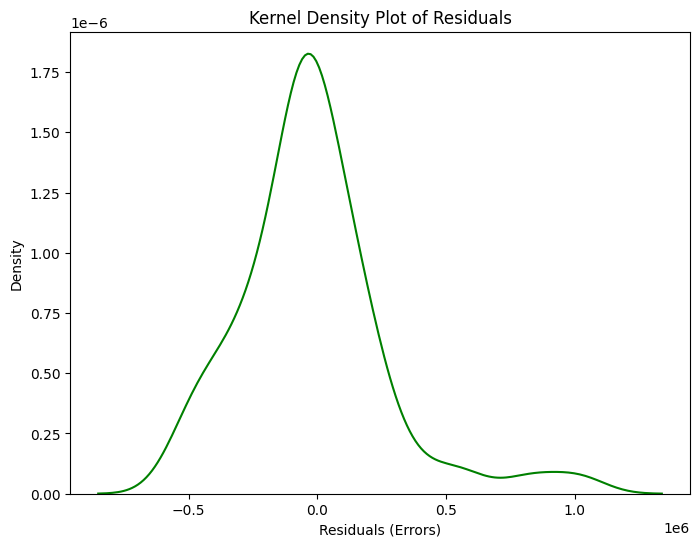

In [30]:
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, color='green')
plt.xlabel('Residuals (Errors)')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Residuals')
plt.show()

In [33]:
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('R^2 on test set is:', test_r2)
print('RMSE on test set is:', test_rmse)

R^2 on test set is: 0.2908824591636343
RMSE on test set is: 285188.67185774696


Model 3, which combines both numeric and categorical variables, performs the best on the test set, as it has the highest R² and the lowest RMSE.

Model 3 performs better than both Model 1 and Model 2:

R² Improvement: Model 3 has an R² of 0.81, which is higher than both Model 1 (0.31) and Model 2 (0.70), indicating that the joint model explains more of the variance in Price.

RMSE Improvement: Model 3 has the lowest RMSE of 285188.67, which is better than both Model 1 (95266117921.29 for training and 81332578555.98 for test) and Model 2 (33412588437.48695), suggesting it provides more accurate predictions.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result.

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure.

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm.

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
